## Before you start


**We** recommend running this notebook on Google Colab to avoid having to install dependencies.

## Load packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
np.random.seed(0)
number_of_samples = 5000

## Provided Code

### Generate Samples from Gaussian

In [ ]:
def generate_gaussian_samples(mean, cov, num):
  """
  mean: 1-D array_like, of length D. Mean of the D-dimensional distribution.
  cov: 2-D array_like, of shape (D, D). Covariance matrix of the distribution. 
  num: desired number of samples to generate.
  return: ndarray, of shape (num, D). The drawn samples. 
  """
  samples = np.random.multivariate_normal(mean, cov, num)
  return samples

### Generate Scatter Plot of Samples

In [ ]:
def scatter_plot(samples):
  """
  samples: 2-D array_like, of shape (num, D). Samples to plot.
  """
  plt.plot(samples[:,0], samples[:,1], 'x')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

### Generate KDE Plot of Estimated Densities

In [ ]:
def KDE_plot(samples):
  """
  samples: 2-D array_like, of shape (num, D). Samples to plot.
  """
  ax = sns.jointplot(x=samples[:,0], y=samples[:,1], kind="kde")
  ax.set_axis_labels(xlabel='Dimension 1', ylabel='Dimension 2')
  plt.tight_layout()
  plt.show()

## Part e: Multivariate Gaussian

In [ ]:
def estimate_mean(samples):
  """
  You cannot use the built-in Numpy functions. You can only use built-in Numpy
  functions for other elementary operations, such as summation and matrix multiplication
  samples: 2D ndarray of shape (num, D). The samples from the distribution whose mean you would like to estimate
  return: 1D ndarray of length D. Sample mean.
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)

  n = np.shape(samples)[0]
  mean = np.sum(samples, axis = 0)
  mean = mean/n
  mu = mean

  return mu

In [ ]:
def estimate_cov(samples):
  """
  You cannot use the built-in Numpy functions. You can only use built-in Numpy
  functions for other elementary operations, such as summation and matrix multiplication
  samples: 2D ndarray of shape (num, D). The samples from the distribution whose covariance you would like to estimate
  return: 2D ndarray of shape (D, D). Sample covariance matrix. 
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)
  
  n = np.shape(samples)[0]
  mu = estimate_mean(samples)

  m1 = samples[:, 0] - mu[0]
  m2 = samples[:, 1] - mu[1]
  covariance = np.sum(m1*m2)/(n-1)
  var_x = np.sum(np.square(m1))/(n-1)
  var_y = np.sum(np.square(m2))/(n-1)
  cov = np.array([[var_x, covariance], [covariance, var_y]])
  
  return cov

estimated_mean [1.92625919 2.97653322]
estimated_cov [[ 9.84299625 -0.03244733]
 [-0.03244733  2.89973631]]


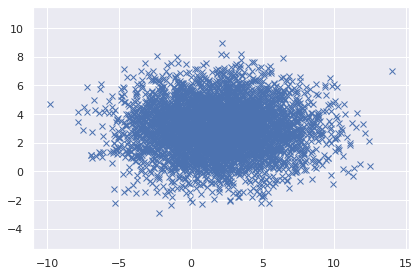

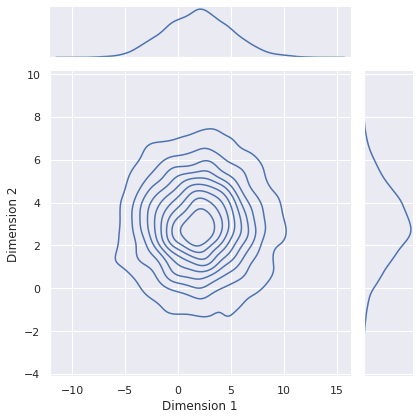

In [ ]:
# TODO: Implement me
number_of_samples = 5000
mean = np.transpose(np.array([2.0, 3.0]))
cov = np.array([[10.0, 0.0], [0.0, 3.0]])
samples = generate_gaussian_samples(mean, cov, number_of_samples)

# Do not modify the lines below

estimated_mean = estimate_mean(samples)
print("estimated_mean", estimated_mean)
assert(estimated_mean.dtype == np.float64)
estimated_cov = estimate_cov(samples)
print("estimated_cov", estimated_cov)
assert(estimated_cov.dtype == np.float64)
assert(estimated_cov.shape == (2, 2))

scatter_plot(samples)
KDE_plot(samples)

## Part f: Transformation of Multivariate Gaussian

In [ ]:
def transformation(samples, mean):
  """
  samples: 2D ndarray of shape (num, D). The samples you like to transform. 
  mean: 1D ndarray of length D. The true mean of the distribution from which samples were drawn. 
  return: 2D ndarray of shape (num, D). Transformed samples. 
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)
  assert(isinstance(mean, np.ndarray))
  assert(len(mean.shape) == 1)
  assert(mean.dtype == np.float64)
  assert(mean.shape[0] == samples.shape[1])
  
  # TODO: Implement me
  X1 = samples[:, 0]
  X2 = samples[:, 1]

  X2 = np.where(X1 < mean[0], X2, (np.absolute(X2 - mean[1]) + mean[1])) 
  X2 = np.where(X1 >= mean[0], X2, ((-1.0*np.absolute(X2 - mean[1]) + mean[1]))) 
  

  #reference from https://kitchingroup.cheme.cmu.edu/blog/2013/02/26/Creating-arrays-in-python/
  samp = np.column_stack([X1, X2])
  return samp

estimated_mean [1.92625919 2.98222446]
estimated_cov [[9.84299625 3.36449469]
 [3.36449469 2.89997108]]


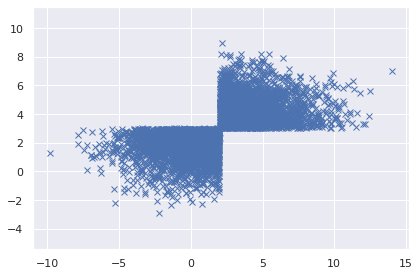

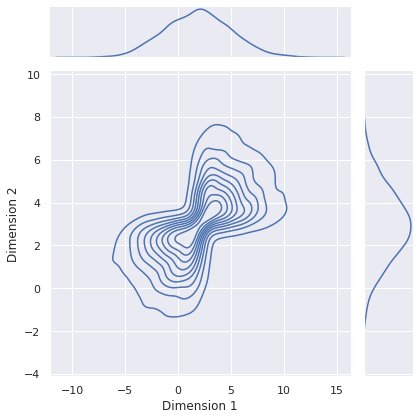

In [ ]:
# TODO: Implement me
samples2 = transformation(samples, mean)

# Do not modify the lines below
estimated_mean2 = estimate_mean(samples2)
print("estimated_mean", estimated_mean2)
assert(estimated_mean2.dtype == np.float64)
estimated_cov2 = estimate_cov(samples2)
print("estimated_cov", estimated_cov2)
assert(estimated_cov2.dtype == np.float64)
assert(estimated_cov2.shape == (2, 2))

scatter_plot(samples2)
KDE_plot(samples2)

## Part g: Independent Univariate Gaussians

estimated_mean [2.01712188 3.02868553]
estimated_cov [[ 9.84432268 -0.03155517]
 [-0.03155517  2.96464599]]


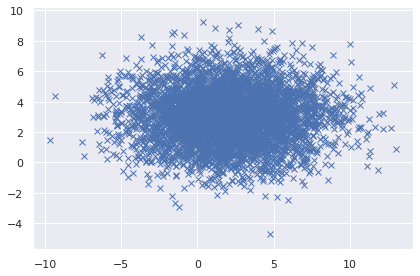

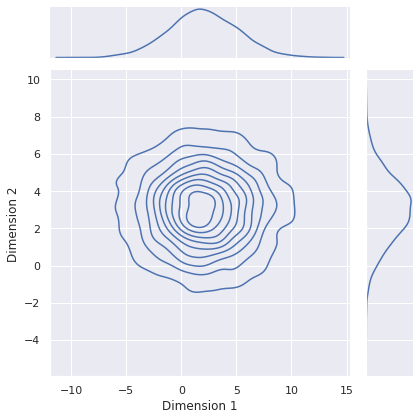

In [ ]:
# TODO: Implement me
number_of_samples = 5000
Y = np.random.normal(2.0, np.sqrt(10.0), number_of_samples)
Z = np.random.normal(3.0, np.sqrt(3.0), number_of_samples)
samples3 = np.column_stack([Y, Z])

# Do not modify the lines below

estimated_mean3 = estimate_mean(samples3)
print("estimated_mean", estimated_mean3)
assert(estimated_mean3.dtype == np.float64)
estimated_cov3 = estimate_cov(samples3)
print("estimated_cov", estimated_cov3)
assert(estimated_cov3.dtype == np.float64)
assert(estimated_cov3.shape == (2, 2))

scatter_plot(samples3)
KDE_plot(samples3)